# Notebook Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

# Helper functions

### Generating random centers

In [2]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

### Get new Cluster

In [3]:
def get_cluster(data, centers, dims, first_cluster=False):
    for point in data:
        
        nearest_center = 0
        nearest_center_distance = None
        
        for i in range(0, len(centers)):
            euclidean_distance = 0
            for d in range(0, dims):
                distance = abs(point[d] - centers[i][d])
                euclidean_distance += distance**2   
            
            euclidean_distance = np.sqrt(euclidean_distance)
            
            if nearest_center_distance == None:
                nearest_center_distance = euclidean_distance
                nearest_center = i
            elif nearest_center_distance > euclidean_distance:
                nearest_center_distance = euclidean_distance
                nearest_center = i
        
        if first_cluster:
            point.append(nearest_center)
            
        else:
            point[-1] = nearest_center
            
    return data

### Average centers

In [4]:
def mean_center(data, centers, dims):
    #print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                #print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
        
            
    return new_centers

# K-means algorithm

In [5]:
def k_means(data, k=2):
    dims = len(data[0])
    prev_centers = None
    centers = random_centers(dims,k)

    clustered_data = get_cluster(data, centers, dims, first_cluster=True)
    
    if prev_centers == None:
        while True:    
            centers = mean_center(clustered_data, centers, dims)
            if prev_centers==None:
                prev_centers = centers
                clustered_data = get_cluster(data, centers, dims, first_cluster=False)  
            elif prev_centers != centers:     
                prev_centers = centers
                clustered_data = get_cluster(data, centers, dims, first_cluster=False)          
            elif prev_centers == centers:
                break
            
    return centers,clustered_data

# Testing / Predicting Cluster

In [6]:
def predict_cluster(point, centers):
    dims = len(point)
    center_dims = len(centers[0])
    
    if dims != center_dims:
        raise ValueError('Point given for prediction has', dims, 'dimensions but centers has', center_dims, 'dimensions')

    nearest_center = None
    nearest_distance = None
    
    for i in range(len(centers)):
        euclidean_distance = 0
        
        for dim in range(1,dims):  
            distance = point[dim] - centers[i][dim]
            euclidean_distance += distance**2
        
        euclidean_distance = np.sqrt(euclidean_distance)
        if nearest_distance == None:
            nearest_distance = euclidean_distance
            nearest_center = i
        elif nearest_distance > euclidean_distance:
            nearest_distance = euclidean_distance
            nearest_center = i
        print('center:',i, 'distance from point:',euclidean_distance)
    
    return nearest_center

# Testing 

Centers:  [[15.419354838709678, 66.70967741935483], [67.57575757575758, 81.87878787878788], [50.25, 24.47222222222222]]
center: 0 distance from point: 46.70967741935483
center: 1 distance from point: 61.878787878787875
center: 2 distance from point: 4.472222222222221
Predicted Cluster for [20, 20] is:  2


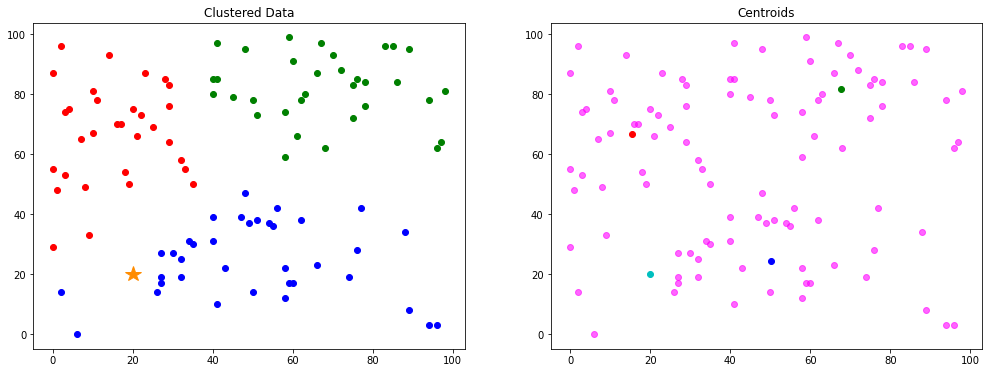

In [7]:
#generating 100 points
random.seed(5)
X = random.sample([[x, y] for x in range(100) for y in range(100)], 100)   

x = []
y = []
for i in range(len(X)):
    x.append(X[i][0])
    y.append(X[i][1])

x0 = []
y0 = []
x1 = []
y1 = []
x2 = []
y2 = []
    
centers,clustered_data = k_means(X, k=3)
print('Centers: ', centers)
for i in  range(len(clustered_data)):
    #print('Clustered_data: ',clustered_data[i][-1])
    if clustered_data[i][-1] == 0:
        x0.append(clustered_data[i][0])
        y0.append(clustered_data[i][1])

    if clustered_data[i][-1] == 1:
        x1.append(clustered_data[i][0])
        y1.append(clustered_data[i][1])
   
    if clustered_data[i][-1] == 2:
        x2.append(clustered_data[i][0])
        y2.append(clustered_data[i][1])

        
#Enter a point
point = [20, 20]
print('Predicted Cluster for',point, 'is: ',predict_cluster(point, centers))

#plot
fig = plt.figure(figsize=[17,6])

#fig1
ax1 = fig.add_subplot(121)
plt.title('Clustered Data')     
plt.scatter(x0, y0, color='r')
plt.scatter(x1, y1, color='g')
plt.scatter(x2, y2, color='b')
plt.plot(point[0], point[1],color ='darkorange', marker = '*', ms=16.0)

#fig2
ax2 = fig.add_subplot(122)   
plt.title('Centroids')
plt.scatter(x, y, color='magenta', alpha=0.6)
plt.plot(centers[0][0], centers[0][1],'or', centers[1][0], centers[1][1], 'go',
         centers[2][0], centers[2][1],'ob', point[0], point[1], 'co')

Centers:  [[51.21875, 19.860576923076923], [75.22509225092251, 70.49815498154982], [20.824281150159745, 68.83386581469648]]
center: 0 distance from point: 0.13942307692307665
center: 1 distance from point: 50.49815498154982
center: 2 distance from point: 48.83386581469648
Predicted Cluster for [20, 20] is:  0


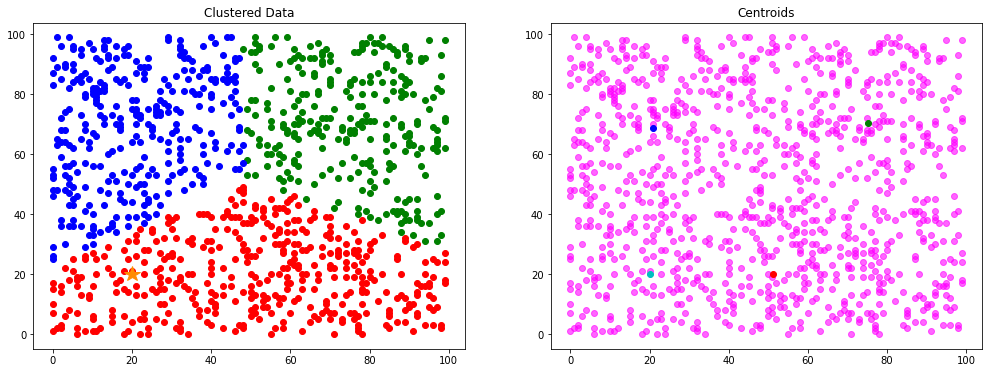

In [8]:
#generating 1000 points
random.seed(5)
X = random.sample([[x, y] for x in range(100) for y in range(100)], 1000)   

x = []
y = []
for i in range(len(X)):
    x.append(X[i][0])
    y.append(X[i][1])

x0 = []
y0 = []
x1 = []
y1 = []
x2 = []
y2 = []
    
centers,clustered_data = k_means(X, k=3)
print('Centers: ', centers)
for i in  range(len(clustered_data)):
    #print('Clustered_data: ',clustered_data[i][-1])
    if clustered_data[i][-1] == 0:
        x0.append(clustered_data[i][0])
        y0.append(clustered_data[i][1])

    if clustered_data[i][-1] == 1:
        x1.append(clustered_data[i][0])
        y1.append(clustered_data[i][1])
   
    if clustered_data[i][-1] == 2:
        x2.append(clustered_data[i][0])
        y2.append(clustered_data[i][1])


        
#Enter a point
point = [20, 20]
print('Predicted Cluster for',point, 'is: ',predict_cluster(point, centers))

#plot
fig = plt.figure(figsize=[17,6])

#fig1
ax1 = fig.add_subplot(121)
plt.title('Clustered Data')     
plt.scatter(x0, y0, color='r')
plt.scatter(x1, y1, color='g')
plt.scatter(x2, y2, color='b')
plt.plot(point[0], point[1],color ='darkorange', marker = '*', ms=16.0)

#fig2
ax2 = fig.add_subplot(122)   
plt.title('Centroids')
plt.scatter(x, y, color='magenta', alpha=0.6)
plt.plot(centers[0][0], centers[0][1],'or', centers[1][0], centers[1][1], 'go',
         centers[2][0], centers[2][1],'ob', point[0], point[1], 'co')

In [9]:
##################Trial#####################
# #generating 200 points
# random.seed(5)
# X = random.sample([[x, y] for x in range(100) for y in range(100)], 100)   

# x = []
# y = []
# for i in range(len(X)):
#     x.append(X[i][0])
#     y.append(X[i][1])

# centers = k_means(X, k=3, epochs=5)
# print('Centers: ', centers)

# #Enter a point
# point = [20,20]
# print('Predicted Cluster for',point, 'is: ',predict_cluster(point, centers))

# #plot
# plt.figure(figsize=[6,4])
# plt.title('Clustered Data')
# plt.scatter(x, y, color='hotpink', alpha=0.6)
# plt.plot(centers[0][0], centers[0][1],'or', centers[1][0], centers[1][1], 'go',
#          centers[2][0], centers[2][1],'ob', point[0], point[1], 'co')